# 数据挖掘 第9周课后作业

> 所选数据集：[Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

> 本作业 Github 地址：[GitHub Address](https://github.com/Nonsensersunny/bit-data-mining/tree/master/homework-7)

## 1. 导入数据集

In [7]:
# 导入依赖
import warnings
import matplotlib.pyplot as plt
import datetime
import sys
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

# 选项设置
np.set_printoptions(threshold=np.inf)
sys.path.append('../')
%matplotlib inline
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

# 导入数据集
path = './vgsales.csv'
data = pd.read_csv(path)

## 2. 数据预处理

In [8]:
# 空行数
data[data['Publisher'].isnull()|data['Year'].isnull()].shape
# 删除空行
data.dropna(how='any',inplace=True)
# 预览
data.info()

(307, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 3. 问题探索
### 3.1 受欢迎游戏类型分析

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


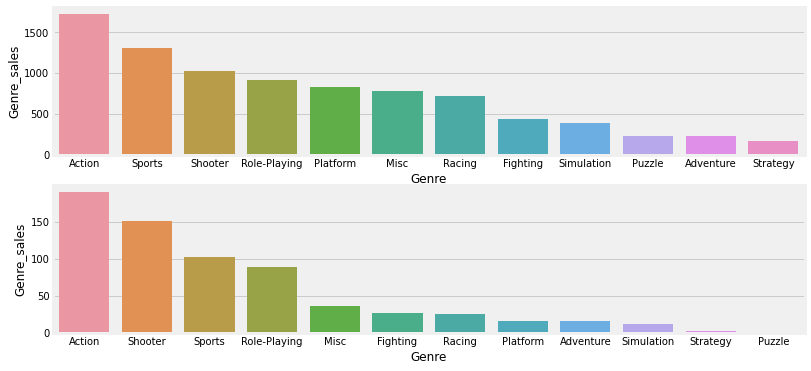

In [9]:
FGE=pd.pivot_table(data,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).sum().sort_values(ascending=False)
FGE=pd.DataFrame(data=FGE,columns={'Genre_sales'})
FGE_near5=pd.pivot_table(df,index='Year',columns='Genre',values='Global_Sales',aggfunc=np.sum).iloc[-5:,:].sum().sort_values(ascending=False)
FGE_near5=pd.DataFrame(data=FGE_near5,columns={'Genre_sales'})
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,6))
sns.barplot(x=FGE.index,y='Genre_sales',data=FGE,ax=ax1)
sns.barplot(x=FGE_near5.index,y='Genre_sales',data=FGE_near5,ax=ax2)

**分析：** 通过上述可视化表示可以发现动作类型的游戏是受用户最喜爱的游戏类型，射击类游戏超越了运动类型的游戏，而格斗类型、解密类和策略类游戏的受欢迎程度一直在下降。

### 3.2 游戏销售额预测

Text(0.5, 1.0, '五大市场发展趋势')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


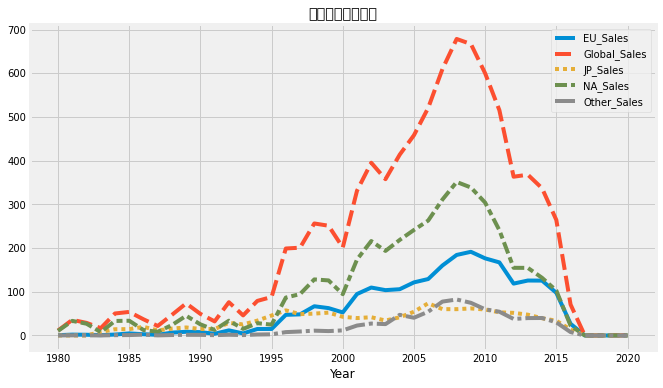

In [10]:
M=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df5market_p=pd.pivot_table(data,index='Year',values=M,aggfunc=np.sum)
fig=plt.figure(figsize=(10,6))
sns.lineplot(data=df5market_p)
plt.title('五大市场发展趋势')

**分析：** 电子游戏销售额在2008年前后达到峰值，随后整体呈下降趋势。

### 3.3 市场销售额预测

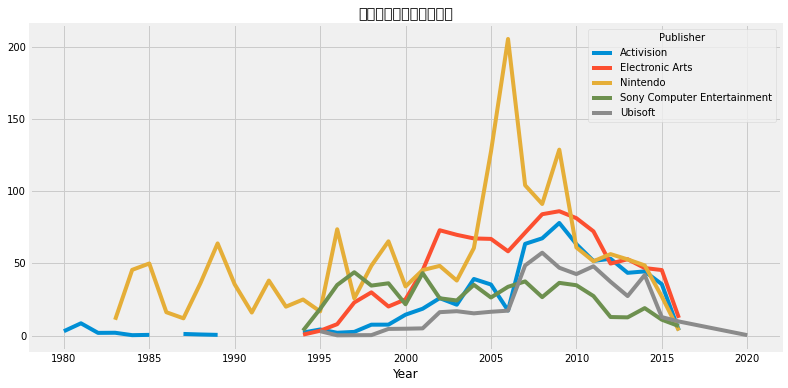

In [11]:
P=['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']
df5PBL=data[data['Publisher'].isin(P)]
df5PBL_p=pd.pivot_table(data=df5PBL,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
df5PBL_p.plot(title='五大发行商历史销售情况',figsize=(12,6))

**分析：** 作为电子游戏的巨头，任天堂的地位一直处于领先，并且在2006年前后达到了巅峰，但是受全球销售额下降的趋势影响，各大游戏厂商的销售额君在2009年之后呈下降态势。